In [1]:
# ==========================
# @title Clustering jerárquico + PCA y T-SNE
# ==========================
# Este cuaderno demuestra la aplicación de clustering jerárquico
# en combinación con técnicas de reducción de dimensionalidad como PCA y T-SNE.
# Se utilizan los datasets Iris y Wine como ejemplos.

In [2]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
# ESTILO VISUAL PARA CLI
class Colors:
    """Clase para guardar los códigos de color para la salida en la terminal."""
    OKCYAN = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def print_subheader(title):
    """Imprime un subencabezado estilizado para secciones del código.

    Args:
        title (str): El título del subencabezado a imprimir.
    """
    print(f"\n{Colors.BOLD}{Colors.OKCYAN}🔹 {title}{Colors.ENDC}")
    print(f"{Colors.OKCYAN}{'-'*40}{Colors.ENDC}")


🔹 Procesando Dataset Iris
----------------------------------------

🔹 Clustering Jerárquico (Iris)
----------------------------------------


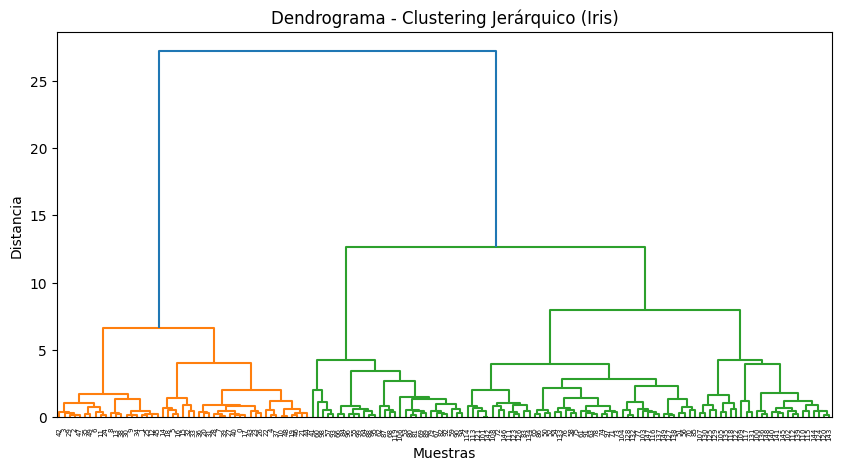

Etiquetas con 2 clústeres: [1 2]
Etiquetas con 3 clústeres: [1 2 3]

🔹 Visualización PCA (Iris)
----------------------------------------


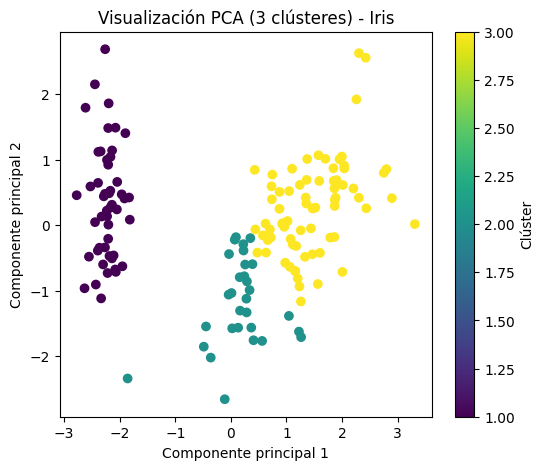


🔹 Visualización T-SNE (Iris)
----------------------------------------


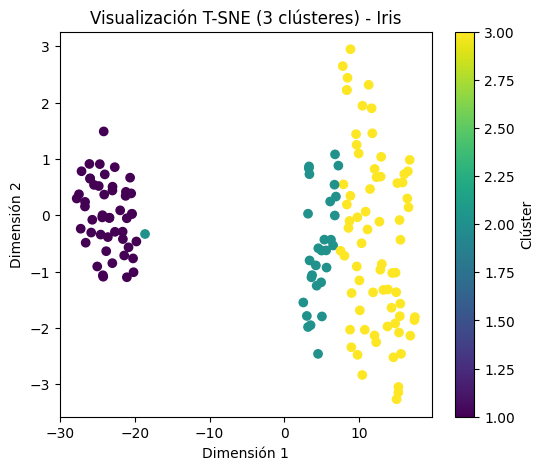


🔹 Interpretación (Iris)
----------------------------------------

Interpretación:
- Los clústeres jerárquicos reflejan una estructura similar a las clases reales del dataset Iris.
- PCA muestra separación parcial entre grupos, útil para entender varianza global.
- T-SNE ofrece mejor separación no lineal, revelando estructuras ocultas más claras.


In [4]:
# ==========================
# Cargar y escalar dataset Iris
# ==========================
print_subheader("Procesando Dataset Iris") # Usar la función para subencabezado
# Usaremos el dataset Iris (sin etiquetas para clustering)
iris = load_iris()
X = iris.data

# Escalar datos para que todas las variables tengan la misma importancia
# StandardScaler elimina la media y escala a la varianza unitaria
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================
# Clustering jerárquico en el dataset Iris
# ==========================
print_subheader("Clustering Jerárquico (Iris)") # Usar la función para subencabezado
# Método 'ward' (minimiza varianza intra-clúster)
# Calcula el enlace entre cada par de muestras no agrupadas y el enlace más cercano
Z = linkage(X_scaled, method='ward')

# Dendrograma para visualizar jerarquías
# Muestra la estructura jerárquica de los clústeres formados
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma - Clustering Jerárquico (Iris)")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()

# Generar agrupamientos (2 y 3 clústeres)
# fcluster extrae clústeres planos del dendrograma
clusters_2 = fcluster(Z, 2, criterion='maxclust')
clusters_3 = fcluster(Z, 3, criterion='maxclust')

print("Etiquetas con 2 clústeres:", np.unique(clusters_2))
print("Etiquetas con 3 clústeres:", np.unique(clusters_3))

# ==========================
# Visualización con PCA en el dataset Iris
# ==========================
print_subheader("Visualización PCA (Iris)") # Usar la función para subencabezado
# PCA reduce la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar PCA con 3 clústeres
# Visualiza las muestras en el espacio PCA coloreadas por las etiquetas de clúster
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_3, cmap='viridis')
plt.title("Visualización PCA (3 clústeres) - Iris")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label="Clúster")
plt.show()

# ==========================
# Visualización con T-SNE en el dataset Iris
# ==========================
print_subheader("Visualización T-SNE (Iris)") # Usar la función para subencabezado
# T-SNE para reducir la dimensionalidad y visualizar en 2D
# Es especialmente bueno para visualizar datos de alta dimensión en baja dimensión
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000) # Changed n_iter to max_iter
X_tsne = tsne.fit_transform(X_scaled)

# Graficar T-SNE con 3 clústeres
# Visualiza las muestras en el espacio T-SNE coloreadas por las etiquetas de clúster
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_3, cmap='viridis')
plt.title("Visualización T-SNE (3 clústeres) - Iris")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.colorbar(label="Clúster")
plt.show()

# ==========================
# Interpretación del dataset Iris
# ==========================
print_subheader("Interpretación (Iris)") # Usar la función para subencabezado
print("\nInterpretación:")
print("- Los clústeres jerárquicos reflejan una estructura similar a las clases reales del dataset Iris.")
print("- PCA muestra separación parcial entre grupos, útil para entender varianza global.")
print("- T-SNE ofrece mejor separación no lineal, revelando estructuras ocultas más claras.")


🔹 Procesando Dataset Wine
----------------------------------------

🔹 Clustering Jerárquico (Wine)
----------------------------------------


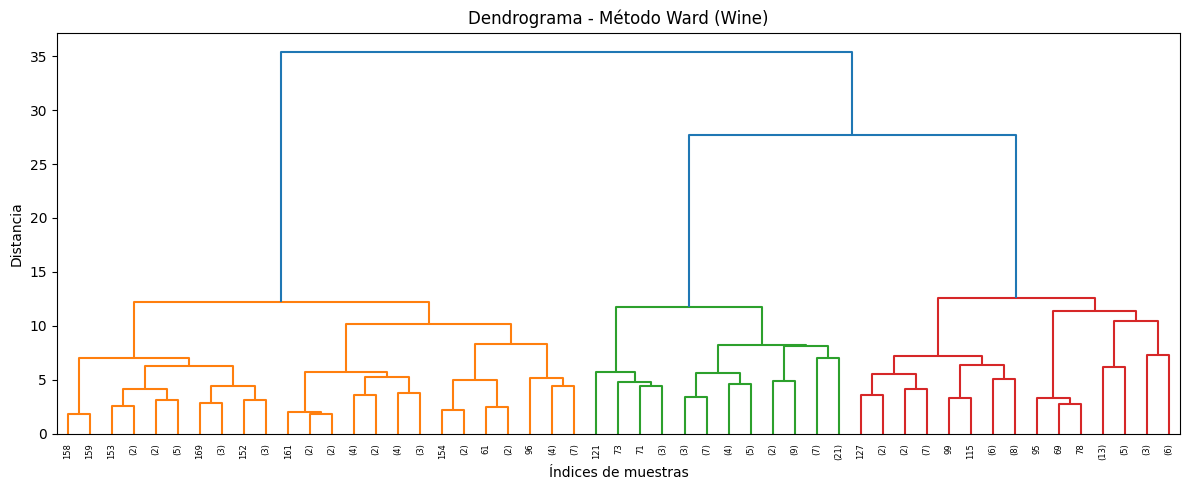


🔹 Visualización PCA (Wine)
----------------------------------------


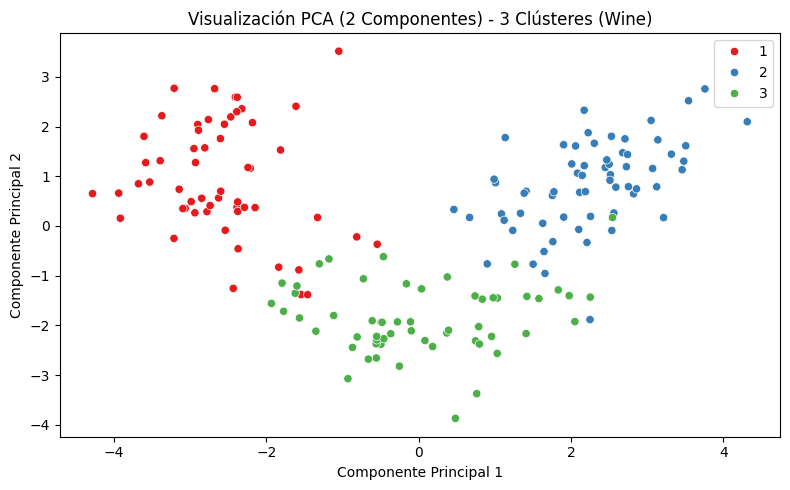


🔹 Visualización T-SNE (Wine)
----------------------------------------


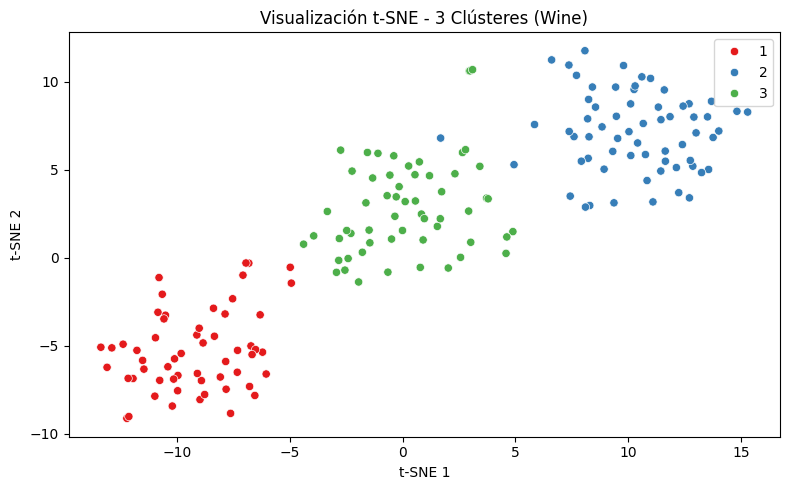

In [5]:
# =========================================
# CLUSTERING JERÁRQUICO CON PCA Y T-SNE
# Aplicado al dataset Wine
# =========================================

# ---------------------------
# Cargar y escalar dataset Wine
# ---------------------------
print_subheader("Procesando Dataset Wine") # Usar la función para subencabezado
# Usamos dataset de vinos
data = load_wine()
X = data.data # Características del dataset

# Escalamos los datos
# StandardScaler elimina la media y escala a la varianza unitaria
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Clustering jerárquico en el dataset Wine
# ---------------------------
print_subheader("Clustering Jerárquico (Wine)") # Usar la función para subencabezado
# Método Ward
# Calcula el enlace entre cada par de muestras no agrupadas y el enlace más cercano
Z_ward = linkage(X_scaled, method='ward')

# Crear agrupamientos con 2 y 3 clústeres
# fcluster extrae clústeres planos del dendrograma
clusters_2 = fcluster(Z_ward, 2, criterion='maxclust')
clusters_3 = fcluster(Z_ward, 3, criterion='maxclust')

# Visualizar dendrograma
# Muestra la estructura jerárquica de los clústeres formados, truncado para mejor visualización
plt.figure(figsize=(12, 5))
dendrogram(Z_ward, truncate_mode='level', p=5)
plt.title("Dendrograma - Método Ward (Wine)")
plt.xlabel("Índices de muestras")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# ---------------------------
# Visualización con PCA en el dataset Wine
# ---------------------------
print_subheader("Visualización PCA (Wine)") # Usar la función para subencabezado
# PCA reduce la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar PCA con 3 clústeres
# Visualiza las muestras en el espacio PCA coloreadas por las etiquetas de clúster
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_3, palette='Set1')
plt.title("Visualización PCA (2 Componentes) - 3 Clústeres (Wine)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()

# ---------------------------
# Visualización con t-SNE en el dataset Wine
# ---------------------------
print_subheader("Visualización T-SNE (Wine)") # Usar la función para subencabezado
# T-SNE para reducir la dimensionalidad y visualizar en 2D
# Es especialmente bueno para visualizar datos de alta dimensión en baja dimensión
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Graficar T-SNE con 3 clústeres
# Visualiza las muestras en el espacio T-SNE coloreadas por las etiquetas de clúster
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters_3, palette='Set1')
plt.title("Visualización t-SNE - 3 Clústeres (Wine)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

In [6]:
# Clustering jerárquico con 2 y 3 clusters usando AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

print_subheader("Agglomerative Clustering") # Usar la función para subencabezado

# Agrupamiento con 2 clusters
# Aplica el clustering jerárquico y predice las etiquetas para 2 clústeres
cluster_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_2 = cluster_2.fit_predict(X_scaled)

# Agrupamiento con 3 clusters
# Aplica el clustering jerárquico y predice las etiquetas para 3 clústeres
cluster_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_3 = cluster_3.fit_predict(X_scaled)

print("Etiquetas para 2 clusters:", np.unique(labels_2))
print("Etiquetas para 3 clusters:", np.unique(labels_3))


🔹 Agglomerative Clustering
----------------------------------------
Etiquetas para 2 clusters: [0 1]
Etiquetas para 3 clusters: [0 1 2]



🔹 Visualización de Clústeres
----------------------------------------


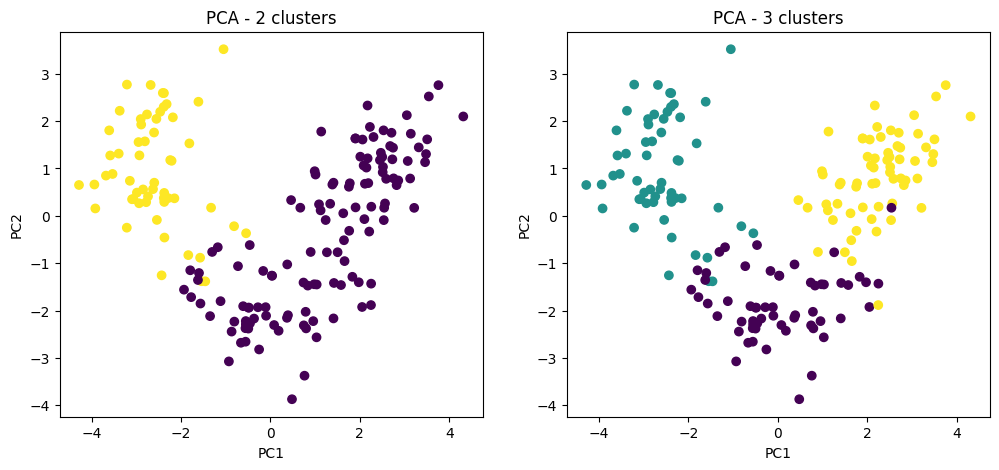

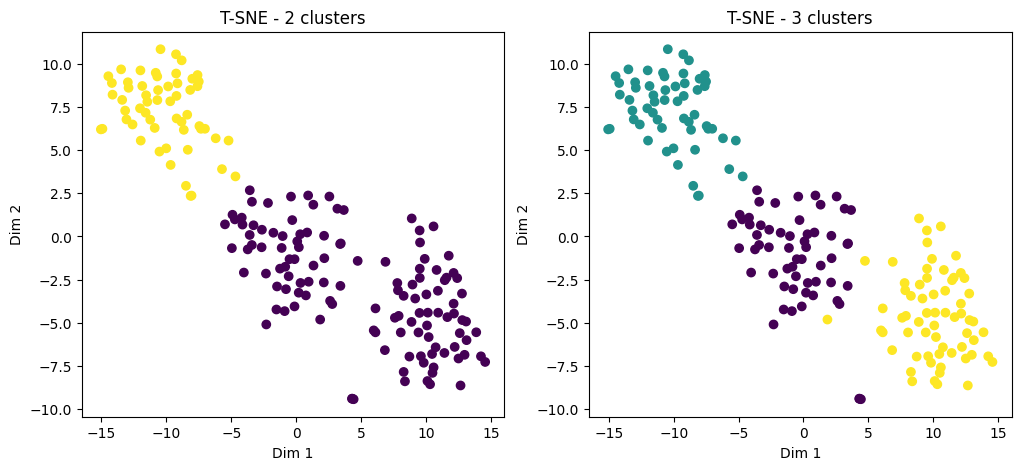

In [7]:
# Visualización PCA y T-SNE para los dos agrupamientos

print_subheader("Visualización de Clústeres") # Usar la función para subencabezado

# PCA
# Reduce la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

# Visualización PCA para 2 clusters
# Grafica las muestras en el espacio PCA coloreadas por las etiquetas de 2 clústeres
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_2, cmap='viridis')
plt.title("PCA - 2 clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Visualización PCA para 3 clusters
# Grafica las muestras en el espacio PCA coloreadas por las etiquetas de 3 clústeres
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_3, cmap='viridis')
plt.title("PCA - 3 clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# T-SNE
# Reduce la dimensionalidad para visualización no lineal
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

# Visualización T-SNE para 2 clusters
# Grafica las muestras en el espacio T-SNE coloreadas por las etiquetas de 2 clústeres
plt.subplot(1,2,1)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_2, cmap='viridis')
plt.title("T-SNE - 2 clusters")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

# Visualización T-SNE para 3 clusters
# Grafica las muestras en el espacio T-SNE coloreadas por las etiquetas de 3 clústeres
plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_3, cmap='viridis')
plt.title("T-SNE - 3 clusters")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


## Interpretación de Resultados

- **Estructura evidente:** Los grupos formados por el algoritmo jerárquico reflejan patrones claros en los datos, especialmente visibles en el dataset Iris. Se observa que con 3 clusters, la separación se acerca más a las clases reales del dataset.

- **Diferencias PCA vs T-SNE:**  
  - **PCA** muestra separación lineal en dos componentes principales, útil para entender la variabilidad general.  
  - **T-SNE** ofrece una separación más detallada y no lineal, resaltando subestructuras y agrupamientos más compactos.

- **Conclusión:** Usar ambos métodos es complementario: PCA ayuda en la reducción dimensional inicial, mientras T-SNE permite ver estructuras más finas en los datos.


# README
Exploración de Datos con Clustering Jerárquico y Reducción de Dimensionalidad

**Objetivo del Proyecto**
Este proyecto aplica **clustering jerárquico aglomerativo** sobre un dataset sin etiquetas conocidas (Iris) para explorar patrones ocultos. Posteriormente, se visualizan los resultados utilizando **PCA** y **T-SNE**, comparando su efectividad como herramientas exploratorias en aprendizaje no supervisado.

---

**Estructura del Notebook**
El notebook sigue la siguiente secuencia lógica:

*Importación de librerías*
*Carga y escalado del dataset*
*Aplicación de clustering jerárquico*
   - Generación de dendrograma
   - Agrupamientos con 2 y 3 clusters
*Reducción de dimensionalidad*
   - Visualización con PCA (2D)
   - Visualización con T-SNE (2D)
*Interpretacion de resultados*
   - Estructura
   - Diferencias entre PCA y T-SNE
   - Conclusión

---

## Librerías Utilizadas y Propósito

* numpy: Manipulación numérica y creación de arreglos.  
* pandas: Manejo de estructuras de datos tipo DataFrame.  
* matplotlib.pyplot: Visualización gráfica (dispersión, dendrogramas).Graficar PCA y T-SNE, y los resultados del clustering.

* seabor: Gráficos estadísticos mejorados.  
* sklearn.datasets: Cargar datasets
* sklearn.preprocessing (StandardScaler): Escalado de variables.  Normalizar los datos antes del clustering.
* scipy.cluster.hierarchy: Realización de clustering jerárquico y generar dendrogramas.  linkage y dendrogram.
* sklearn.cluster (AgglomerativeClustering): Creación de  agrupamientos jerárquicos con número de clusters definido.  Generamos 2 y 3 clusters para comparar.
* sklearn.decomposition (PCA): Reducción lineal de dimensionalidad. Representación de datos en 2D para graficar.
* sklearn.manifold (TSNE): Reducción no lineal de dimensionalidad.  Muestra clusters en espacio 2D más realista para datos complejos.

---

## Resultados Esperados
- Dendrograma mostrando jerarquías de agrupamiento.
- Visualizaciones de 2 y 3 clusters en PCA y T-SNE.
- Comparación clara entre métod
